### Objective: To predict which customers respond positively to an automobile insurance offer

#### Step 1: Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
import dask.dataframe as dd

In [ ]:
# Read training file
train_data = dd.read_csv("/content/drive/MyDrive/Kaggle - Insurance Classification - Data/train.csv")

In [ ]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [ ]:
# Check shape of train dataset
train_data.shape

(Delayed('int-e85762b9-ce37-4dd6-937f-67cad0415888'), 12)

In [ ]:
# Further exploring the dataset
train_data.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 12 entries, id to Response
dtypes: float64(3), int64(6), string(3)

In [ ]:
# Check for NULL values in each column
train_data.isnull().sum()

Dask Series Structure:
npartitions=1
Age    int64
id       ...
dtype: int64
Dask Name: to_pyarrow_string, 6 graph layers

<font color="blue"> There are no null values in this dataset </font>

In [ ]:
# Doing descriptive analysis on numerical variables
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
npartitions=1,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...


<font color="red"> To-do: Find correlation between each independent variable vs dependent variable </font>

In [ ]:
# Analyzing Categorical Variables
train_data["Vehicle_Age"].value_counts()

Dask Series Structure:
npartitions=1
    int64[pyarrow]
               ...
Name: count, dtype: int64[pyarrow]
Dask Name: value-counts-agg, 5 graph layers

<font color="red"> To-do: Replace '< 1 Year' with 0, '1-2 Year' with 1, and '> 2 Years' with 2 </font>

In [ ]:
train_data["Vehicle_Damage"].value_counts()

Dask Series Structure:
npartitions=1
    int64[pyarrow]
               ...
Name: count, dtype: int64[pyarrow]
Dask Name: value-counts-agg, 5 graph layers

<font color="red"> To-do: Replace 'Yes' with 1 and 'No' with 0 </font>

In [ ]:
# Read test file
test_data = dd.read_csv("/content/drive/MyDrive/Kaggle - Insurance Classification - Data/test.csv")
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [ ]:
test_data.shape

(7669866, 11)

In [ ]:
# Descriptive analytics on test data
test_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06,7.669866e+06
mean,1.533973e+07,3.839137e+01,9.980208e-01,2.642661e+01,4.630772e-01,3.046553e+04,1.123650e+02,1.638996e+02
std,2.214100e+06,1.499951e+01,4.444387e-02,1.299433e+01,4.986349e-01,1.644586e+04,5.407358e+01,7.998445e+01
min,1.150480e+07,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01
25%,1.342226e+07,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.528000e+04,2.900000e+01,9.900000e+01
50%,1.533973e+07,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182700e+04,1.510000e+02,1.660000e+02
75%,1.725720e+07,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.946000e+04,1.520000e+02,2.320000e+02
max,1.917466e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02


#### Step 2: Data Wrangling and Feature Engineering

In [ ]:
# Creating a copy of the train_data
train_data_copy = train_data.copy()
train_data_copy.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [ ]:
# Creating a copy of the test_data
test_data_copy = test_data.copy()
test_data_copy.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


ID Column

In [ ]:
# Dropping "ID" column
train_data_copy.drop("id", axis=1, inplace=True)

In [ ]:
# Making another dataset for test IDs
test_id = test_data_copy["id"]
test_id.head()

0    11504798
1    11504799
2    11504800
3    11504801
4    11504802
Name: id, dtype: int64

In [ ]:
# Dropping ID column from test data
test_data_copy.drop("id", axis=1, inplace=True)
test_data_copy.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


Gender Column

In [ ]:
# One hot encoding of "Gender" column
train_data_copy = pd.get_dummies(train_data_copy, columns=["Gender"])

In [ ]:
train_data_copy.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male
0,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0,False,True
1,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1,False,True
2,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,True,False
3,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0,True,False
4,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,True,False


In [ ]:
# On test data
test_data_copy = pd.get_dummies(test_data_copy, columns=["Gender"])

Age Column

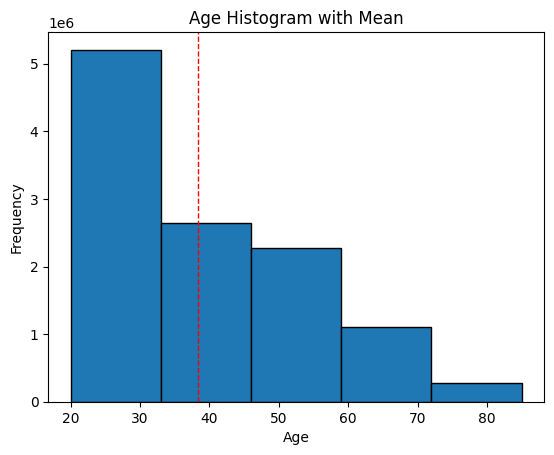

In [ ]:
# Plot the histogram for 'Age'
plt.hist(train_data_copy['Age'], bins=5, edgecolor='black')

# Show mean age
mean_age = train_data_copy['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1, label=f'Mean Age = {mean_age:.2f}')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram with Mean')

# Display the plot
plt.show()

In [ ]:
# Checking correlation between 'Age' and target variable 'Response'
train_data_copy["Age"].corr(train_data_copy["Response"])

0.1221337357945491

<font color="blue"> There is a weak positive correlation between 'Age' and 'Response'</font>

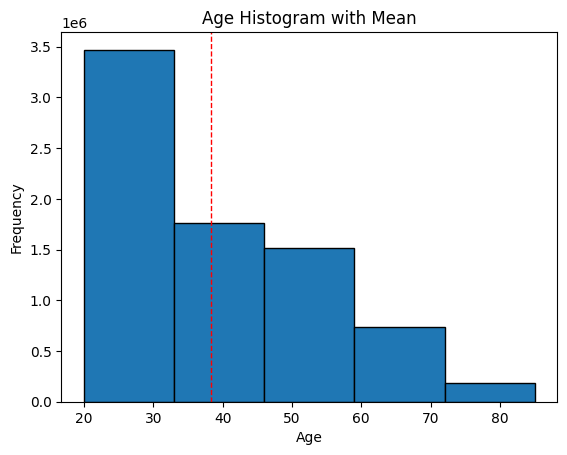

In [ ]:
# Checking the distribution for test data

# Plot the histogram for 'Age'
plt.hist(test_data_copy['Age'], bins=5, edgecolor='black')

# Show mean age
mean_age_test = test_data_copy['Age'].mean()
plt.axvline(mean_age_test, color='red', linestyle='dashed', linewidth=1, label=f'Mean Age = {mean_age_test:.2f}')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram with Mean')

# Display the plot
plt.show()

Region_Code Column

In [ ]:
# Deep diving into region codes in order to figure out how to handle them
sorted_region_codes = train_data_copy["Region_Code"].unique()
sorted_region_codes.sort()

print(sorted_region_codes)

[ 0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
 14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
 28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  39.2 40.
 41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52. ]


In [ ]:
train_data_copy["Region_Code"].value_counts()

Region_Code
28.0    3451062
8.0     1021036
46.0     578208
41.0     557581
15.0     403977
30.0     367307
29.0     338146
50.0     302334
11.0     278261
36.0     261946
3.0      246303
33.0     232387
47.0     229190
35.0     200035
6.0      181122
45.0     159292
37.0     158976
18.0     148548
39.0     138068
14.0     134585
21.0     126793
10.0     126081
2.0      118097
48.0     114230
13.0     108838
9.0       93371
7.0       92240
12.0      92142
27.0      78878
32.0      78797
43.0      75868
17.0      74533
26.0      71228
25.0      70556
24.0      69136
38.0      60587
0.0       59274
20.0      58765
31.0      58442
16.0      54905
23.0      54518
4.0       52504
49.0      50822
34.0      48685
19.0      44197
22.0      36932
5.0       36832
40.0      35888
1.0       33966
44.0      20305
42.0      13693
52.0       3450
51.0       1880
39.2          1
Name: count, dtype: int64

1) We can drop the outlier '39.2' as it will give a lot of null values when we do One Hot Encoding on "Region Code"

2) We will let classification algorithm like xgboost handle One Hot Encoding of "Region Code". For this, we will convert this column to Categorical

In [ ]:
# Dropping row with "Region_Code = 39.2"
print("Before dropping the row:", train_data_copy.shape[0])

train_data_copy = train_data_copy[train_data_copy["Region_Code"] != 39.2]

print("After dropping the row:", train_data_copy.shape[0])

Before dropping the row: 11504798
After dropping the row: 11504797


In [ ]:
# Converting all values of "Region_Code" to String
#train_data_copy["Region_Code"] = train_data_copy["Region_Code"].astype(str)

In [ ]:
# Checking if the above was successful
#print("Before Conversion:", train_data["Region_Code"].dtype)
#print("After Conversion:", train_data_copy["Region_Code"].dtype)

In [ ]:
# One hot encoding of Region_Code
train_data_copy = pd.get_dummies(train_data_copy, columns=["Region_Code"])

In [ ]:
# Checking if the above was successful
print("Before Conversion:", train_data.shape)
print("After Conversion:", train_data_copy.shape)

Before Conversion: (11504798, 12)
After Conversion: (11504797, 64)


In [ ]:
# Checking correlation between 'Region_Code' and 'Response'
train_data["Region_Code"].corr(train_data["Response"])

0.01281632396933006

<font color="blue"> There is a weak positive correlation between 'Region_Code" and "Response" </font>

In [ ]:
# One hot encoding of Region_Code in test data
test_data_copy = pd.get_dummies(test_data_copy, columns=["Region_Code"])

In [ ]:
# Checking if the above was successful
print("Before Conversion:", test_data.shape)
print("After Conversion:", test_data_copy.shape)

Before Conversion: (7669866, 11)
After Conversion: (7669866, 63)


Vehicle_Age Column

In [ ]:
# Label Encoding of Vehicle_Age column as they have ordinal relationship
# Replace '< 1 Year' with 0, '1-2 Year' with 1, and '> 2 Years' with 2

replace_map = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}

train_data_copy["Vehicle_Age"] = train_data_copy["Vehicle_Age"].replace(replace_map)

In [ ]:
# Checking data types before and after label encoding
print("Before Conversion:", train_data["Vehicle_Age"].dtype)
print("After Conversion:", train_data_copy["Vehicle_Age"].dtype)

Before Conversion: object
After Conversion: int64


In [ ]:
# Checking correlation between "Vehicle_Age" and "Response"
train_data_copy["Vehicle_Age"].corr(train_data_copy["Response"])

0.23102933681336185

<font color="blue"> There is a slightly higher correlation between "Vehicle_Age" and "Response" as compared to "Age" vs. "Response" and "Region_Code" vs. "Response" </font>

In [ ]:
# Label Encoding Vehicle_Age for test data
test_data_copy["Vehicle_Age"] = test_data_copy["Vehicle_Age"].replace(replace_map)

Vehicle_Damage

In [ ]:
# Label Encoding this variable
# Replace 'Yes' with 1 and 'No' with 0

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'Vehicle_Damage' column
train_data_copy['Vehicle_Damage'] = label_encoder.fit_transform(train_data_copy['Vehicle_Damage'])

In [ ]:
# Checking if the conversion has been done correctly
print(train_data["Vehicle_Damage"].value_counts())
print(train_data_copy["Vehicle_Damage"].value_counts())

Vehicle_Damage
Yes    5783229
No     5721569
Name: count, dtype: int64
Vehicle_Damage
1    5783229
0    5721568
Name: count, dtype: int64


In [ ]:
# Checking correlation between "Vehicle_Damage" and "Response"
train_data_copy["Vehicle_Damage"].corr(train_data_copy["Response"])

0.35977980634173296

<font color="blue"> There is a slightly higher correlation between "Vehicle_Damage" and "Response" </font>

In [ ]:
# Fit and transform 'Vehicle_Damage' column for test data
test_data_copy['Vehicle_Damage'] = label_encoder.fit_transform(test_data_copy['Vehicle_Damage'])

Annual Premium

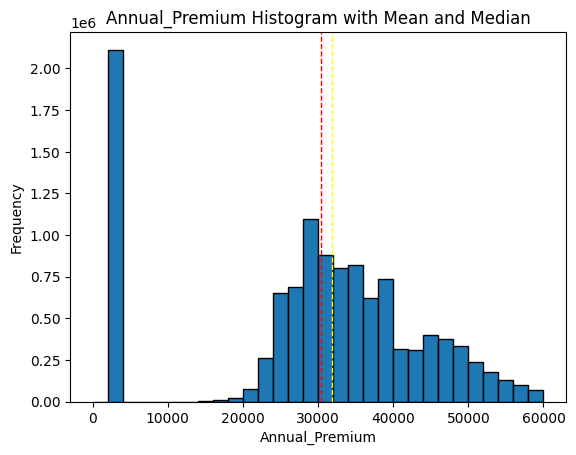

In [ ]:
# Plot the histogram for 'Annual_Premium'
plt.hist(train_data_copy['Annual_Premium'], bins=30, edgecolor='black', range=(0, 60000))

# Show mean Annual Premium
mean_ap = train_data_copy['Annual_Premium'].mean()
plt.axvline(mean_ap, color='red', linestyle='dashed', linewidth=1, label=f'Mean Annual_Premium = {mean_ap:.2f}')

# Show median Annual Premium
median_ap = train_data_copy['Annual_Premium'].median()
plt.axvline(median_ap, color='yellow', linestyle='dashed', linewidth=1, label=f'Median Annual_Premium = {median_ap:.2f}')

# Add labels and title
plt.xlabel('Annual_Premium')
plt.ylabel('Frequency')
plt.title('Annual_Premium Histogram with Mean and Median')

# Display the plot
plt.show()

In [ ]:
# Checking correlation between "Annual_Premium" and "Response"
train_data_copy["Annual_Premium"].corr(train_data_copy["Response"])

0.03226061862843329

<font color="blue"> There is a very weak positive correlation between "Annual_Premium" and "Response" </font>

Policy_Sales_Channel

In [ ]:
# Deep diving into Policy_Sales_Channel in order to figure out how to handle them
sorted_psc_codes = train_data_copy["Policy_Sales_Channel"].unique()
sorted_psc_codes.sort()

print(sorted_psc_codes)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  73.  74.  75.  76.  78.  79.  80.  81.  82.  83.  86.  87.  88.
  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102.
 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116.
 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130.
 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 145. 146. 147. 148.
 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 163.]


In [ ]:
# Checking correlation between "Policy_Sales_Channel" and "Response"
train_data_copy["Policy_Sales_Channel"].corr(train_data_copy["Response"])

-0.15273281169995834

<font color="blue"> There is a negative correlation. This means lower the Policy_Sales_Channel number, higher the chances of Response </font>

Vintage

In [ ]:
# Deep diving into Vintage in order to figure out how to handle them
sorted_vintage_codes = train_data_copy["Vintage"].unique()
sorted_vintage_codes.sort()

print(sorted_vintage_codes)

[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 25

In [ ]:
# Checking correlation between "Vintage" and "Response"
train_data_copy["Vintage"].corr(train_data_copy["Response"])

-0.01517675788823205

<font color="blue"> There is a weak negative correlation </font>

If there is a weak correlation between dependent (target) and independent (feature) variables in a classification problem, it does not necessarily mean that dropping those independent variables will not affect the classification model. Here are a few considerations:

Understanding Correlation in Classification:
Impact of Features: Features (independent variables) that have weak correlation with the target variable may still provide valuable information for the classification model. They might contribute to capturing nuances or interactions in the data that are not captured by stronger correlations alone.

Feature Importance: Even if a feature has weak correlation individually, it could still be important in combination with other features. Machine learning algorithms often consider interactions between features, which can lead to improved model performance.

Model Performance: Dropping features, even those with weak correlation, can impact the model’s ability to generalize and make accurate predictions. It's crucial to assess the model's performance (e.g., accuracy, precision, recall) both with and without these features to understand their actual contribution.

Steps to Consider:
Feature Selection: Instead of solely relying on correlation, consider using techniques like feature selection algorithms (e.g., Recursive Feature Elimination, feature importance from tree-based models) to identify which features are most relevant for your classification task.

Cross-validation: Evaluate your model performance using cross-validation techniques to assess how dropping certain features affects the model’s ability to generalize to new data.

Domain Knowledge: Incorporate domain knowledge to understand the relevance of each feature. Sometimes, features that seem weakly correlated can still provide critical context or information that improves the model's performance.

Conclusion:
While weakly correlated features may not contribute as significantly to the model as strongly correlated ones, their removal should be based on rigorous evaluation of model performance and understanding of their potential impact. Blindly dropping features solely based on weak correlation can lead to loss of valuable information and might negatively impact model accuracy and robustness. Therefore, it's essential to approach feature selection and model optimization holistically, considering all aspects of your data and problem domain.

In [ ]:
# Compute correlation matrix

# Select only numerical columns
numerical_columns = train_data_copy.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

                           Age  Driving_License  Previously_Insured  \
Age                   1.000000        -0.078519           -0.276248   
Driving_License      -0.078519         1.000000            0.013733   
Previously_Insured   -0.276248         0.013733            1.000000   
Vehicle_Age           0.779041        -0.036511           -0.396752   
Vehicle_Damage        0.287952        -0.015563           -0.836214   
Annual_Premium        0.056326        -0.007300            0.007665   
Policy_Sales_Channel -0.591443         0.042941            0.236837   
Vintage              -0.013293        -0.000697            0.019432   
Response              0.122134         0.009197           -0.345930   

                      Vehicle_Age  Vehicle_Damage  Annual_Premium  \
Age                      0.779041        0.287952        0.056326   
Driving_License         -0.036511       -0.015563       -0.007300   
Previously_Insured      -0.396752       -0.836214        0.007665   
Vehicle_Age  

Response Column

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
train_data_copy["Response"] = imputer.fit_transform(train_data_copy["Response"].values.reshape(-1, 1))

In [ ]:
# Convert to integer
train_data_copy["Response"] = train_data_copy["Response"].astype(int)

In [ ]:
train_data_copy['Response'].value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

#### Experiment 1: XG Boost

In [ ]:
# Creating a copy of train data copy
train_data_copy1 = train_data_copy.copy()

In [ ]:
# Split into train and test data
X_1 = train_data_copy1.drop(columns=['Response'])
y_1 = train_data_copy1['Response']

In [ ]:
# Split data into training and validation sets
X_1_train, X_1_valid, y_1_train, y_1_valid = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [ ]:
# Train an XGBoost classifier
xgb_classifier_1 = xgb.XGBClassifier()
xgb_classifier_1.fit(X_1_train, y_1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions on the validation set
y_1_pred = xgb_classifier_1.predict(X_1_valid)

In [ ]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_1_valid, y_1_pred)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.880


In [ ]:
# Creating a copy of test data copy
test_data_copy1 = test_data_copy.copy()

In [ ]:
# Make predictions on the test set
y_test_1_pred = xgb_classifier_1.predict(test_data_copy)

In [ ]:
# Preparing Submission File
submission_exp1 = pd.DataFrame()
submission_exp1['id'] = test_id
submission_exp1['Response'] = y_test_1_pred

submission_exp1.head()

,id,Response
0,11504798,0
1,11504799,0
2,11504800,0
3,11504801,0
4,11504802,0


In [ ]:
submission_exp1.shape

(7669866, 2)

In [ ]:
submission_exp1.to_csv('submission_exp1.csv', index=False)